In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Question 1:

In [2]:
# Load in training data and take a look at it
train = pd.read_csv('/Users/rachaelmccown/Desktop/moz_customer_data_train.csv', delimiter='|')

In [3]:
train.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid
0,1585597623,NaN,GB,Chrome,1092,25.607595
1,6531970533,healthcare,US,Firefox,2480,115.579494
2,8443866239,health care,Canada,Chrome,1671,89.462246
3,1480089466,healthcare,Greece,Chrome,465,33.836123
4,6170390298,marketing agency,USA,Firefox,1477,129.394415


In [4]:
train.describe()

,id,session_time_prior_month_seconds,prior_month_paid
count,4.800000e+04,48000.000000,48000.000000
mean,4.997442e+09,1952.151854,85.624461
std,2.896754e+09,2579.835645,32.754654
min,3.134830e+05,1.000000,0.040000
25%,2.481218e+09,612.000000,63.845328
50%,4.993512e+09,1210.000000,87.822595
75%,7.516707e+09,2289.000000,111.080471
max,9.999608e+09,50233.000000,165.758664


In [5]:
# Convert seconds to minutes
train['session_time_prior_month_minutes'] = train['session_time_prior_month_seconds'] / 60
train.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid,session_time_prior_month_minutes
0,1585597623,NaN,GB,Chrome,1092,25.607595,18.200000
1,6531970533,healthcare,US,Firefox,2480,115.579494,41.333333
2,8443866239,health care,Canada,Chrome,1671,89.462246,27.850000
3,1480089466,healthcare,Greece,Chrome,465,33.836123,7.750000
4,6170390298,marketing agency,USA,Firefox,1477,129.394415,24.616667


In [6]:
train.dtypes

id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
session_time_prior_month_minutes    float64
dtype: object

In [7]:
# Check for null values
train.isnull().sum(axis = 0)

id                                     0
industry                            7364
geography                              0
most_common_browser                    0
session_time_prior_month_seconds       0
prior_month_paid                       0
session_time_prior_month_minutes       0
dtype: int64

In [8]:
# Fill null values in industry column with 'unknown'
train['industry'] = train['industry'].fillna('unknown')
train.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid,session_time_prior_month_minutes
0,1585597623,unknown,GB,Chrome,1092,25.607595,18.200000
1,6531970533,healthcare,US,Firefox,2480,115.579494,41.333333
2,8443866239,health care,Canada,Chrome,1671,89.462246,27.850000
3,1480089466,healthcare,Greece,Chrome,465,33.836123,7.750000
4,6170390298,marketing agency,USA,Firefox,1477,129.394415,24.616667


In [9]:
# Make sure NAs were replaced properly
train.isnull().sum(axis = 0)

id                                  0
industry                            0
geography                           0
most_common_browser                 0
session_time_prior_month_seconds    0
prior_month_paid                    0
session_time_prior_month_minutes    0
dtype: int64

In [10]:
# Look at counts by industry
pd.crosstab(index=train['industry'], columns='count') 

col_0,count
industry,
Marketing Agency,6012
health care,6052
healthcare,5911
marketing agency,6052
mktg agency,6031
software,5879
unk,2366
unknown,9697


### We can see there is both 'unk' and 'unknown' in the industry column of this dataset. This is also the case with a the marketing and healthcare industries. We'll combine them.

In [11]:
train['industry'] = train['industry'].replace(['unk'],'unknown')
train['industry'] = train['industry'].replace(['health care'],'healthcare')
train['industry'] = train['industry'].replace(['mktg agency', 'Marketing Agency'],'marketing agency')

In [12]:
# Make sure the values got replaced correctly
pd.crosstab(index=train['industry'], columns='count').sort_values('count', ascending=0)

col_0,count
industry,
marketing agency,18095
unknown,12063
healthcare,11963
software,5879


In [13]:
# Look at counts by country
pd.crosstab(index=train['geography'], columns='count').sort_values('count', ascending=0)

col_0,count
geography,
USA,8573
CA,5381
Canada,5328
US,4309
America,4305
United States,4270
UK,2114
Pakistan,1797
Greece,1782


### We can see the same issue here with a few different countries. Again, we'll combine them.

In [14]:
train['geography'] = train['geography'].replace(['US', 'America', 'USA'],'United States')
train['geography'] = train['geography'].replace(['CA'],'Canada')
train['geography'] = train['geography'].replace(['GB', 'UK', 'England'],'United Kingdom')
train['geography'] = train['geography'].replace(['Esp'], 'Spain')

In [15]:
# Make sure the values got replaced properly
pd.crosstab(index=train['geography'], columns='count').sort_values('count', ascending=0)

col_0,count
geography,
United States,21457
Canada,10709
United Kingdom,5260
Spain,3483
Pakistan,1797
Greece,1782
India,1773
France,1739


### Let's visualize the counts.

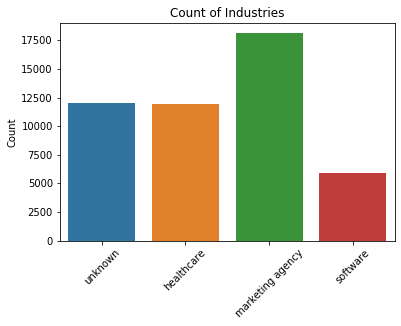

In [16]:
ax = sns.countplot(x='industry', data=train).set_title('Count of Industries')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### It looks like most of the customers are from the marketing agency industry.

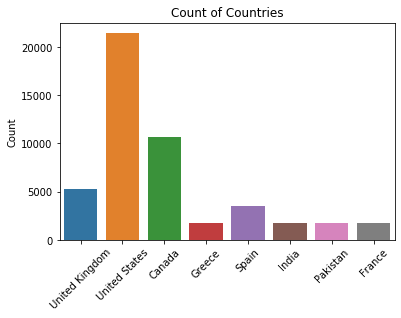

In [17]:
ax = sns.countplot(x='geography', data=train).set_title('Count of Countries')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### We can see most of the customers come from the United States and Canada.

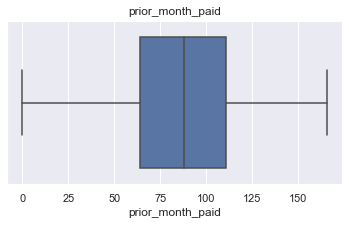

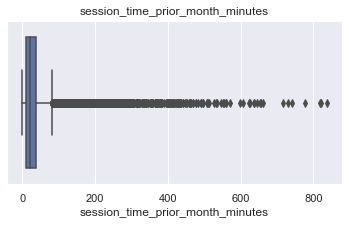

In [18]:
# Create boxplots to look for outliers
sns.set(rc={'figure.figsize':(6,3)})
for x in train.iloc[:,5:]:
    sns.set(style="darkgrid")
    ax = sns.boxplot(x=x, data=train).set_title(x)
    plt.show()

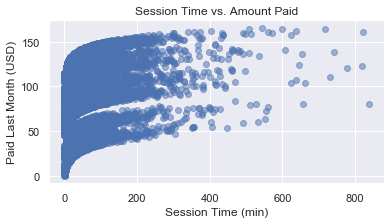

In [19]:
# Scatter plot to look at session time and amount paid
plt.scatter(train['session_time_prior_month_minutes'],train['prior_month_paid'], alpha=0.5)
plt.title('Session Time vs. Amount Paid')
plt.xlabel('Session Time (min)')
plt.ylabel('Paid Last Month (USD)')
plt.show()

### It looks like we'll have to do some scaling/outlier removal.

### Now, let's look at the most common browser by industry and country.

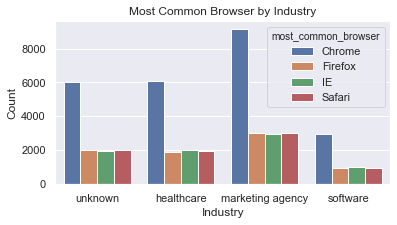

In [20]:
chart = sns.countplot(x="industry", hue="most_common_browser", data=train)
plt.title('Most Common Browser by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

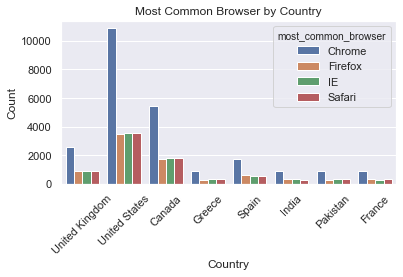

In [21]:
chart = sns.countplot(x="geography", hue="most_common_browser", data=train)
plt.title('Most Common Browser by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### Chrome seems to be the most common browser across industries as well as across countries.

### Next, let's look at the average of the session_time_prior_month_minutes and prior_month_paid columns.

In [22]:
# By industry
indus_avg = train.groupby('industry').mean().iloc[:,2:].reset_index().sort_values('prior_month_paid', ascending=0)
indus_avg

,industry,prior_month_paid,session_time_prior_month_minutes
1,marketing agency,106.562781,32.789693
0,healthcare,81.615152,32.050279
2,software,78.725228,32.399286
3,unknown,61.554582,32.703233


In [23]:
# By country
country_avg = train.groupby('geography').mean().iloc[:,2:].reset_index().sort_values('prior_month_paid', ascending=0)
country_avg

,geography,prior_month_paid,session_time_prior_month_minutes
7,United States,108.071149,32.438256
0,Canada,93.495397,32.184883
6,United Kingdom,53.245475,32.896324
5,Spain,48.578456,33.666140
1,France,48.488527,32.430123
4,Pakistan,48.379933,32.743063
2,Greece,47.929663,31.446867
3,India,47.325642,33.535524


### It appears customers in the marketing agency industry and customers from Spain spend the most time using Moz.com tools, while customers from the marketing agency industry and customers from the US paid Moz the most in the past month.

### Let's look at the average time per session by industry/country and USD paid in the last month by industry/country.

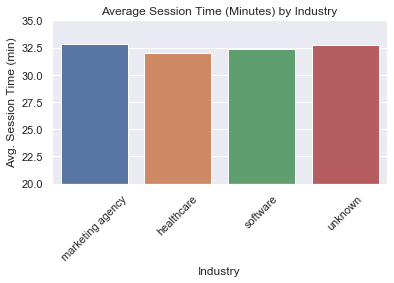

In [24]:
chart = sns.barplot(x='industry', y="session_time_prior_month_minutes", data=indus_avg)
plt.title('Average Session Time (Minutes) by Industry')
plt.xlabel('Industry')
plt.ylim(20, 35)
plt.xticks(rotation=45)
plt.ylabel('Avg. Session Time (min)')
plt.show()

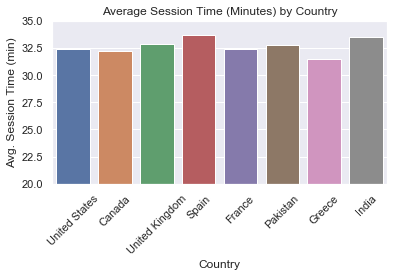

In [25]:
chart = sns.barplot(x='geography', y="session_time_prior_month_minutes", data=country_avg)
plt.title('Average Session Time (Minutes) by Country')
plt.xlabel('Country')
plt.ylim(20, 35)
plt.xticks(rotation=45)
plt.ylabel('Avg. Session Time (min)')
plt.show()

### We can see that all industries/countries are pretty even when it comes to the average minutes spent logged into Moz.com tools.

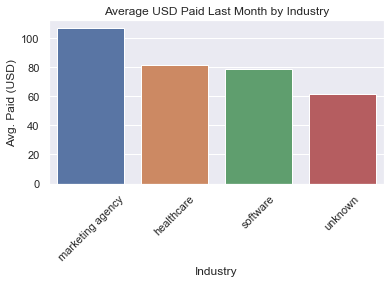

In [26]:
chart = sns.barplot(x='industry', y="prior_month_paid", data=indus_avg)
plt.title('Average USD Paid Last Month by Industry')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.ylabel('Avg. Paid (USD)')
plt.show()

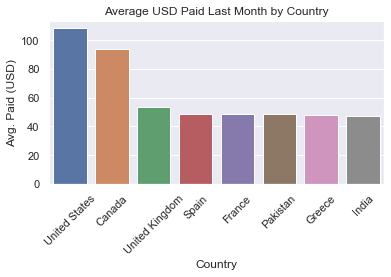

In [27]:
chart = sns.barplot(x='geography', y="prior_month_paid", data=country_avg)
plt.title('Average USD Paid Last Month by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Avg. Paid (USD)')
plt.show()

### We can see that marketing agency industry and the US & Canada paid the most last month, on average.

### In conclusion, we can see that the amount of time spent in Moz.com tools is not very strongly correlated with the amount (USD) paid to Moz in the last month, but both industry and country appear to have some affect. We also found that most customers come from the US or Canada, are from the marketing industry, and use Chrome as their primary browser.

# Question 2:

In [28]:
# Scale data and remove outliers

scaler = MinMaxScaler() 
data_scaled = pd.DataFrame(scaler.fit_transform(train.iloc[:,5:]), columns = ['paid_norm', 'min_norm'])
z_scores = stats.zscore(data_scaled)
z_scores_abs = np.abs(z_scores)
filtered_entries = (z_scores_abs < 3).all(axis=1)
scaled_filtered = data_scaled[filtered_entries]

scaled_filtered = scaled_filtered.join(train['industry'])
scaled_filtered = scaled_filtered.join(train['geography'])
scaled_filtered = scaled_filtered.join(train['most_common_browser'])
scaled_filtered.head()

,paid_norm,min_norm,industry,geography,most_common_browser
0,0.154283,0.021719,unknown,United Kingdom,Chrome
1,0.697203,0.049351,healthcare,United States,Firefox
2,0.539603,0.033246,healthcare,Canada,Chrome
3,0.203937,0.009237,healthcare,Greece,Chrome
4,0.780566,0.029384,marketing agency,United States,Firefox


In [29]:
scaled_filtered.describe()

,paid_norm,min_norm
count,47102.000000,47102.000000
mean,0.513769,0.033956
std,0.196682,0.033573
min,0.000000,0.000000
25%,0.382784,0.012064
50%,0.527237,0.021799
75%,0.667189,0.044573
max,0.922929,0.192865


In [30]:
# Create dummy variables from categorical features
train_dummy = pd.get_dummies(scaled_filtered)
train_dummy.head()

,paid_norm,min_norm,industry_healthcare,industry_marketing agency,industry_software,industry_unknown,geography_Canada,geography_France,geography_Greece,geography_India,geography_Pakistan,geography_Spain,geography_United Kingdom,geography_United States,most_common_browser_Chrome,most_common_browser_Firefox,most_common_browser_IE,most_common_browser_Safari
0,0.154283,0.021719,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,0.697203,0.049351,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0.539603,0.033246,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0.203937,0.009237,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0.780566,0.029384,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [31]:
# List correlation of features against target variable
corr_list = train_dummy[train_dummy.columns[0:]].corr()['paid_norm'][:]
corr_list.sort_values(ascending = False)

paid_norm                      1.000000
geography_United States        0.618614
industry_marketing agency      0.497952
min_norm                       0.226649
geography_Canada               0.129717
most_common_browser_Chrome     0.008147
most_common_browser_Safari     0.000890
most_common_browser_IE        -0.003921
most_common_browser_Firefox   -0.007943
industry_healthcare           -0.070367
industry_software             -0.078016
geography_France              -0.220983
geography_Pakistan            -0.225253
geography_Greece              -0.227183
geography_India               -0.229835
geography_Spain               -0.318027
geography_United Kingdom      -0.348912
industry_unknown              -0.426862
Name: paid_norm, dtype: float64

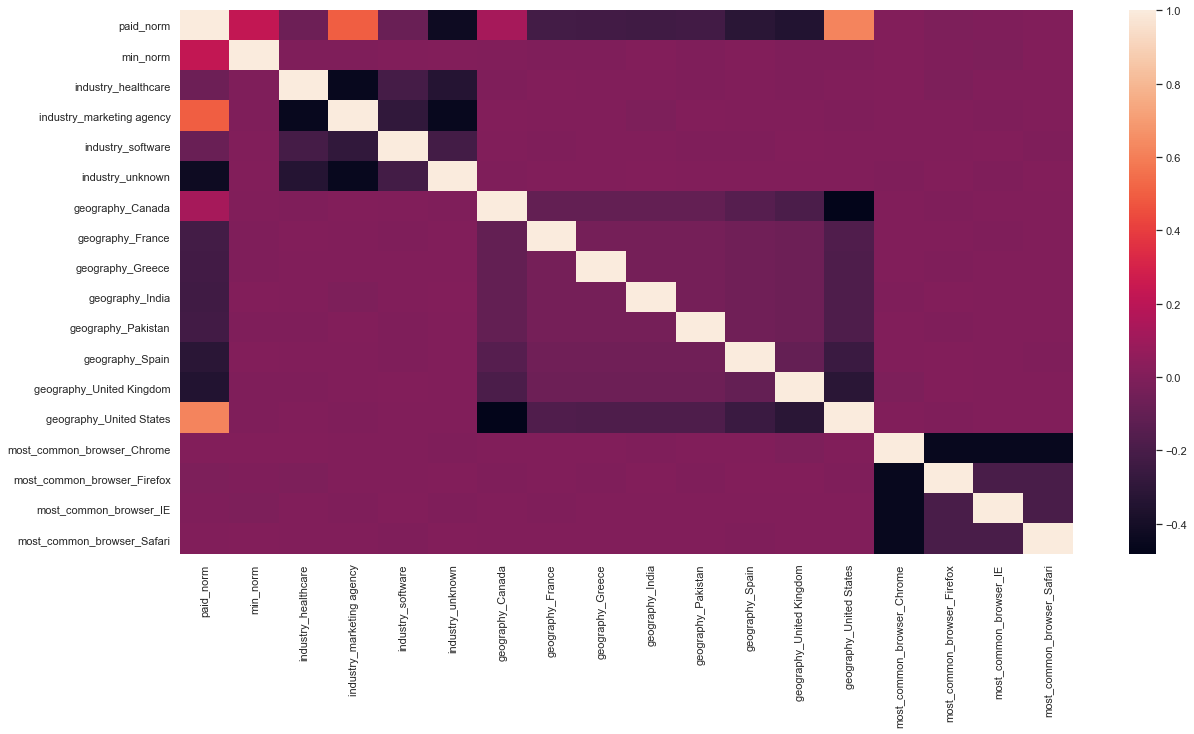

In [32]:
# visulatize correlations
plt.figure(figsize=(20,10))
sns.heatmap(train_dummy.corr())

In [33]:
# seperate target and features
X = train_dummy.loc[:, train_dummy.columns != 'paid_norm']
y = train_dummy['paid_norm'].values.reshape(-1,1)

print(len(X))
print(len(y))

47102
47102


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)

Intercept:  [-3.62807218e+11]
Coefficients:  [[ 1.35735564e+00 -3.89043210e+11 -3.89043210e+11 -3.89043210e+11
  -3.89043210e+11  2.78111051e+11  2.78111051e+11  2.78111051e+11
   2.78111051e+11  2.78111051e+11  2.78111051e+11  2.78111051e+11
   2.78111051e+11  4.73739377e+11  4.73739377e+11  4.73739377e+11
   4.73739377e+11]]


In [37]:
pred = regressor.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [39]:
print('RMSE: ', rmse)

RMSE:  0.029735942388870992


In [40]:
X2 = sm.add_constant(X)

In [41]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.482e+05
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:50:36   Log-Likelihood:                 99444.
No. Observations:               47102   AIC:                        -1.989e+05
Df Residuals:                   47087   BIC:                        -1.987e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Question 3:

### This looks to be a pretty good model, when looking at the RMSE and R^2 score. All of the p-values are very low, indicating we should keep all features in the model.

# Question 4:

### Load test set and complete same clean up steps as we did in training data.

In [42]:
test = pd.read_csv('/Users/rachaelmccown/Desktop/moz_customer_data_test.csv', delimiter='|')

In [43]:
test.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid
0,8721560330,health care,America,Safari,405,94.086123
1,5265684450,unk,England,IE,4460,44.434942
2,7023768415,Marketing Agency,Esp,Firefox,289,53.311472
3,7733403428,NaN,America,Firefox,4242,98.500425
4,9147925075,NaN,USA,Safari,431,76.246123


In [44]:
test.isnull().sum(axis = 0)

id                                     0
industry                            1713
geography                              0
most_common_browser                    0
session_time_prior_month_seconds       0
prior_month_paid                       0
dtype: int64

In [45]:
test['session_time_prior_month_minutes'] = test['session_time_prior_month_seconds'] / 60
test.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid,session_time_prior_month_minutes
0,8721560330,health care,America,Safari,405,94.086123,6.750000
1,5265684450,unk,England,IE,4460,44.434942,74.333333
2,7023768415,Marketing Agency,Esp,Firefox,289,53.311472,4.816667
3,7733403428,NaN,America,Firefox,4242,98.500425,70.700000
4,9147925075,NaN,USA,Safari,431,76.246123,7.183333


In [46]:
test['industry'] = test['industry'].fillna('unknown')
test.head()

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid,session_time_prior_month_minutes
0,8721560330,health care,America,Safari,405,94.086123,6.750000
1,5265684450,unk,England,IE,4460,44.434942,74.333333
2,7023768415,Marketing Agency,Esp,Firefox,289,53.311472,4.816667
3,7733403428,unknown,America,Firefox,4242,98.500425,70.700000
4,9147925075,unknown,USA,Safari,431,76.246123,7.183333


In [47]:
test.isnull().sum(axis = 0)

id                                  0
industry                            0
geography                           0
most_common_browser                 0
session_time_prior_month_seconds    0
prior_month_paid                    0
session_time_prior_month_minutes    0
dtype: int64

In [48]:
test['industry'] = test['industry'].replace(['unk'],'unknown')
test['industry'] = test['industry'].replace(['health care'],'healthcare')
test['industry'] = test['industry'].replace(['mktg agency', 'Marketing Agency'],'marketing agency')
pd.crosstab(index=test['industry'], columns='count') 

col_0,count
industry,
healthcare,3018
marketing agency,4500
software,1533
unknown,2949


In [49]:
test['geography'] = test['geography'].replace(['US', 'America', 'USA'],'United States')
test['geography'] = test['geography'].replace(['CA'],'Canada')
test['geography'] = test['geography'].replace(['GB', 'UK', 'England'],'United Kingdom')
test['geography'] = test['geography'].replace(['Esp'], 'Spain')
pd.crosstab(index=test['geography'], columns='count').sort_values('count', ascending=0)

col_0,count
geography,
United States,5346
Canada,2539
United Kingdom,1345
Spain,930
India,483
Pakistan,472
France,448
Greece,437


In [50]:
scaler = MinMaxScaler() 
data_scaled_test = pd.DataFrame(scaler.fit_transform(test.iloc[:,5:]), columns = ['paid_norm', 'min_norm'])
z_scores = stats.zscore(data_scaled_test)
z_scores_abs = np.abs(z_scores)
filtered_entries = (z_scores_abs < 3).all(axis=1)
scaled_filtered_test = data_scaled_test[filtered_entries]

scaled_filtered_test = scaled_filtered_test.join(test['industry'])
scaled_filtered_test = scaled_filtered_test.join(test['geography'])
scaled_filtered_test = scaled_filtered_test.join(test['most_common_browser'])
scaled_filtered_test.head()

,paid_norm,min_norm,industry,geography,most_common_browser
0,0.583437,0.011348,healthcare,United States,Safari
1,0.275283,0.125246,unknown,United Kingdom,IE
2,0.330374,0.008089,marketing agency,Spain,Firefox
3,0.610834,0.119123,unknown,United States,Firefox
4,0.472715,0.012078,unknown,United States,Safari


In [51]:
# Create dummy variables from categorical features
test_dummy = pd.get_dummies(scaled_filtered_test)
test_dummy.head()

,paid_norm,min_norm,industry_healthcare,industry_marketing agency,industry_software,industry_unknown,geography_Canada,geography_France,geography_Greece,geography_India,geography_Pakistan,geography_Spain,geography_United Kingdom,geography_United States,most_common_browser_Chrome,most_common_browser_Firefox,most_common_browser_IE,most_common_browser_Safari
0,0.583437,0.011348,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.275283,0.125246,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0.330374,0.008089,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.610834,0.119123,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,0.472715,0.012078,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [52]:
regressor.fit(test_dummy.loc[:, test_dummy.columns != 'paid_norm'],
              test_dummy['paid_norm'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)

Intercept:  [-1.93448228e+12]
Coefficients:  [[1.00640857e+00 9.84775219e+11 9.84775219e+11 9.84775219e+11
  9.84775218e+11 4.89744630e+11 4.89744630e+11 4.89744630e+11
  4.89744630e+11 4.89744630e+11 4.89744630e+11 4.89744630e+11
  4.89744630e+11 4.59962433e+11 4.59962433e+11 4.59962433e+11
  4.59962433e+11]]


In [54]:
pred = regressor.predict(test_dummy.loc[:, test_dummy.columns != 'paid_norm'])

In [55]:
mse = mean_squared_error(test_dummy['paid_norm'].values.reshape(-1,1), pred)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  0.030299397171199862


In [56]:
X2 = sm.add_constant(test_dummy.loc[:, test_dummy.columns != 'paid_norm'])

In [57]:
est = sm.OLS(test_dummy['paid_norm'].values.reshape(-1,1), X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.717e+04
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:50:36   Log-Likelihood:                 24448.
No. Observations:               11766   AIC:                        -4.887e+04
Df Residuals:                   11751   BIC:                        -4.876e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Similar to when the model was ran on the training date, it performed very well with an R^2 value of .978 and and RMSE of  .0303. Again, low p-values indicate we do not need to remove any features.

# Question 5:

### My recommendation to the company would be to continue marketing efforts towards customers based in the US or Canada and customers from the marketing industy, but also to push a little harder in the other countries/industries to increase sales in those markets. I would also recommend finding a way to standardize the way the industry and country are input (multiple choice or dropdown) into the customer data so that part of the carpentry process can be avoided in the future.